In [3]:
%pip install matplotlib
%pip install gdown

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import sklearn.svm as svm
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 7회차 과제
목표: SVM 및 KNN을 중점으로 하여 기계 학습의 전 과정 실습해보기  
(수업 자료의 `과제 연계 실습` 참고)

## 음용 가능 여부 분류하기

다음은 물과 관련한 여러 정보와 음용 가능 여부가 담긴 데이터이다. SVM 및 KNN을 사용하여 음용 가능 여부를 예측하되, 최소 60%의 정확도를 달성하시오.  
단, 학습-검증 비율은 8:2로 한다.

In [4]:
gdown.download("https://drive.google.com/uc?id=1Hr792DKij8Tp0LWxMBf9vrzouopGFdjH", "water.csv", quiet=False)
water = pd.read_csv('water.csv')
water.head()

Downloading...
From: https://drive.google.com/uc?id=1Hr792DKij8Tp0LWxMBf9vrzouopGFdjH
To: /Users/sunghokang/water.csv
100%|█████████████████████████████████████████| 525k/525k [00:01<00:00, 363kB/s]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


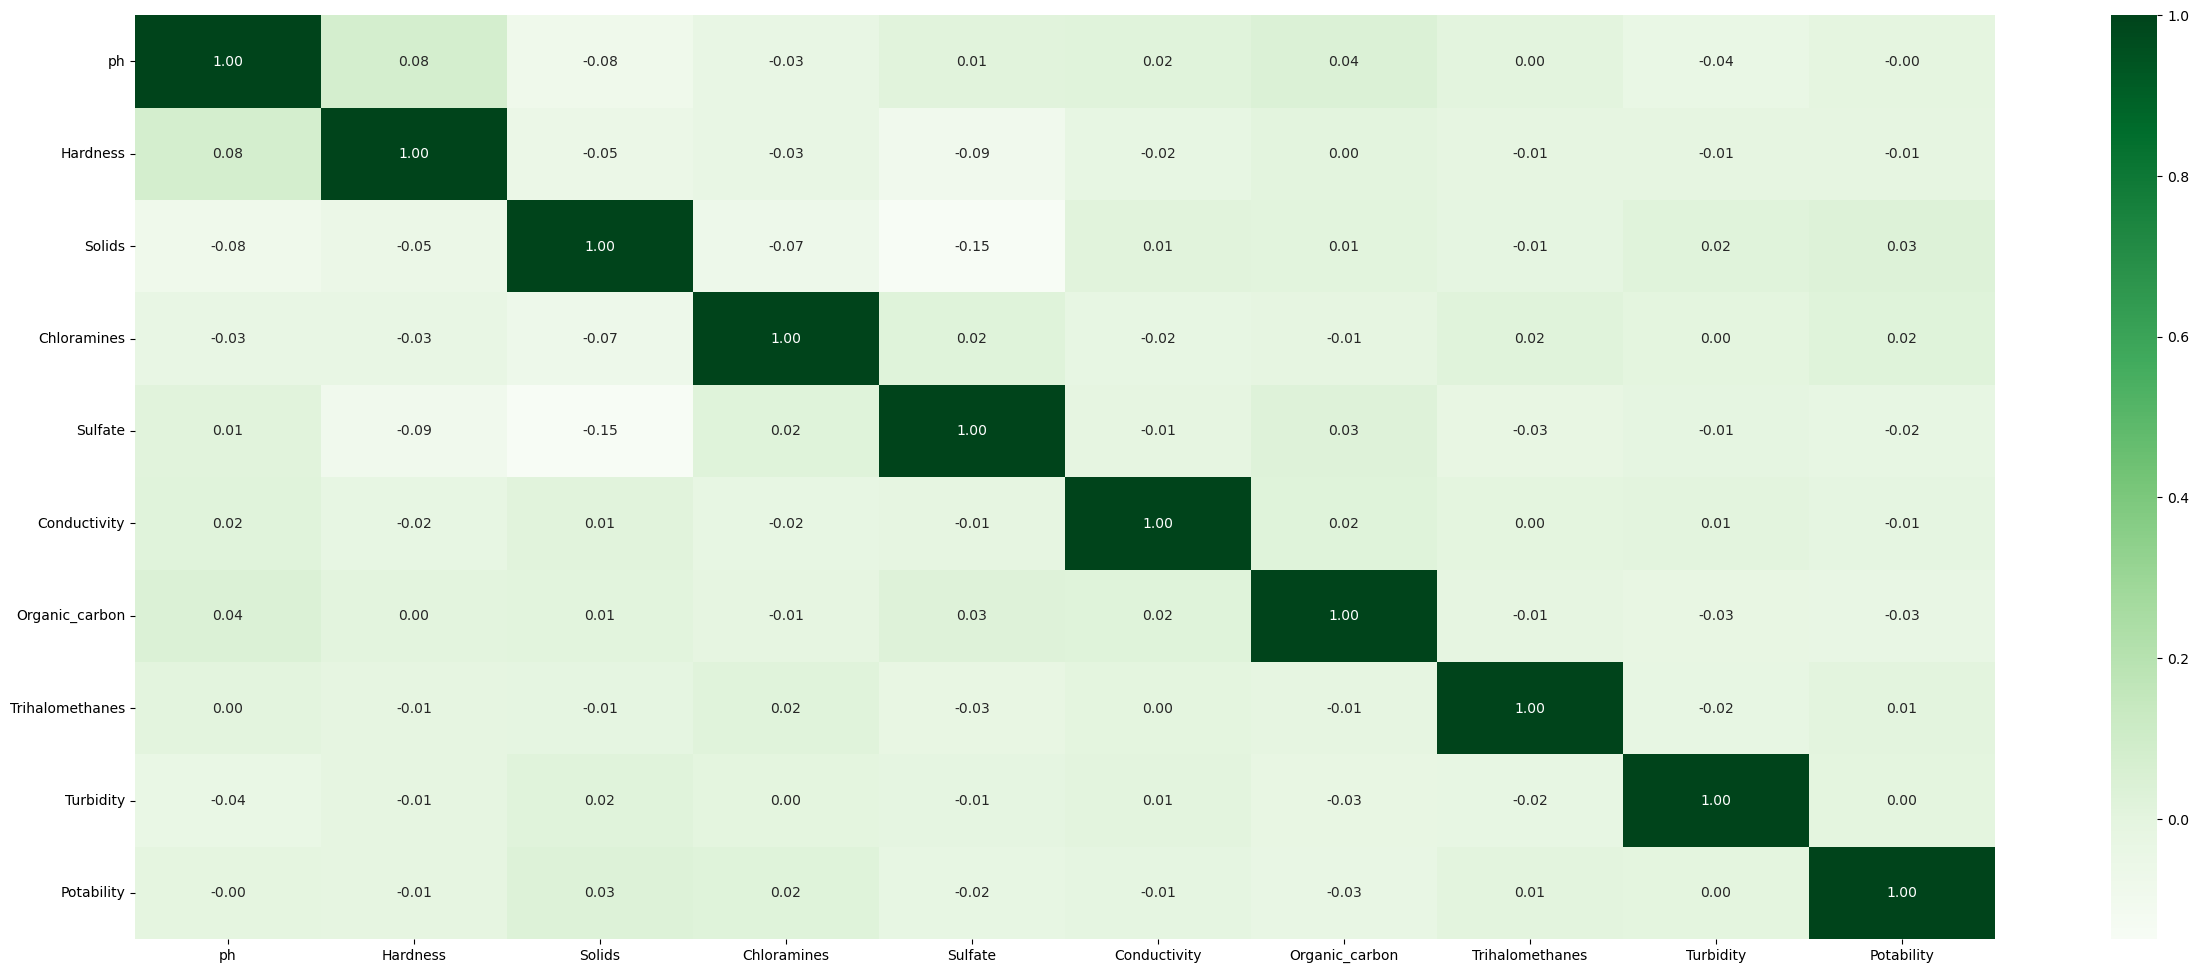

NameError: name 'train_Y_scaled' is not defined

In [14]:
water.isnull().sum() #이상치 
water = water.fillna(water.mean())
Check_Correlation = water.corr()
plt.figure(figsize=(30,12))
sns.heatmap(Check_Correlation, annot=True, fmt=".2f", cmap="Greens")
plt.show()

Good_Column = ["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity","Potability"]

train, test = train_test_split(water, test_size=.2, random_state=3)
train_X = train[Good_Column]
train_Y = train["Potability"] #이게 마실수있는지 

test_X = test[Good_Column]
test_Y = test["Potability"]

train_scaler = StandardScaler()
train_scaler.fit(train_X)

test_scaler = StandardScaler()
test_scaler.fit(test_X)

train_X_scaled = train_scaler.transform(train_X)
test_X_scaled = test_scaler.transform(test_X)

svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_X_scaled, train_Y_scaled)

svm_accuracy = svm_model.score(test_X, test_Y)

print(f"SVM 정확도: {svm_accuracy}")


